# Plot Fourier spectrum of non-integer wave spectrum
### In one dimension:

$\displaystyle e^{i\omega\varphi} = \frac{\sin(\pi\omega)}{\pi}\sum_{n=-\infty}^\infty\frac{(-1)^n}{\omega - n}e^{in\varphi},\quad \varphi\in[-\pi, \pi)$

and in radial polar coordinates (two dimensions),

$\displaystyle e^{i\omega\varphi}\textbf{J}_\omega(\rho) = \frac{\sin(\pi\omega)}{\pi}\sum_{n=-\infty}^\infty\frac{(-1)^n}{\omega-n}J_n(\rho)e^{in\varphi},\quad \varphi\in[-\pi, \pi)$

In [3]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
from matplotlib import rcParams

plt.style.use('dark_background')

rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 12]

%matplotlib inline

In [62]:
# 1D grid
phi = np.linspace(-np.pi, np.pi, num=250)

### Analyze in 1D first

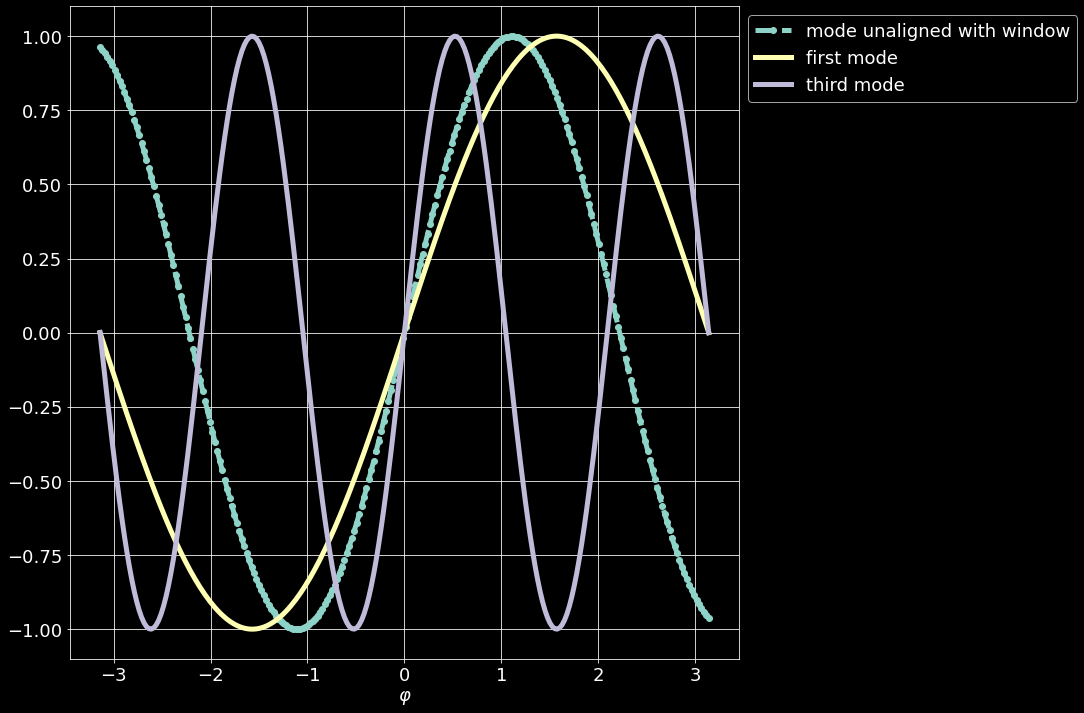

In [63]:
# Plot a representative non-integer wavelength
%matplotlib inline

plt.close('all')
plt.figure()
plt.plot(phi, np.sin(np.sqrt(2.0) * phi), 'o--', linewidth=5, label='mode unaligned with window')
plt.plot(phi, np.sin(phi), linewidth=5, label='first mode')
plt.plot(phi, np.sin(3.0 * phi), linewidth=5, label='third mode')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.xlabel(r'$\varphi$')
plt.grid(True)
plt.show()

Text(0, 0.5, 'Amplitude')

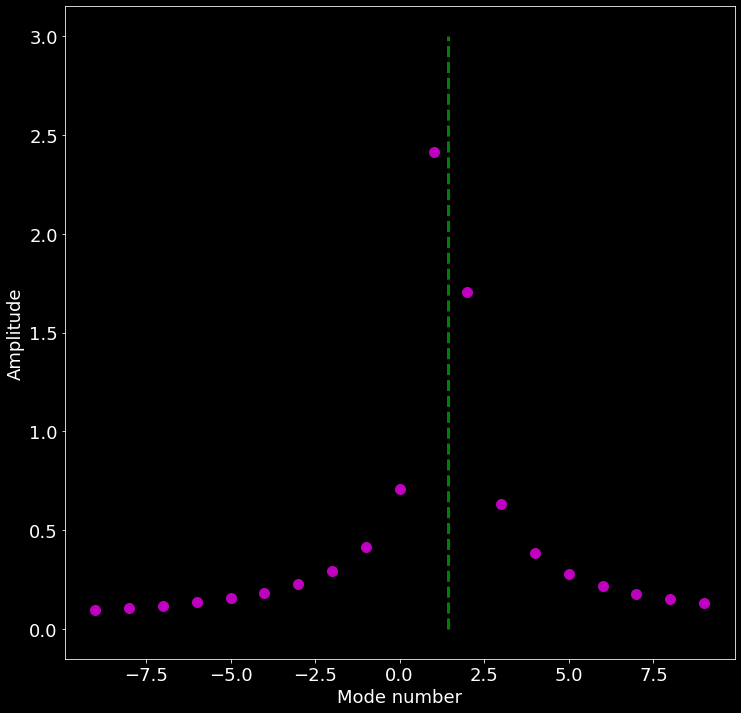

In [64]:
def coefficients_1D(n, om):
    return (-1.0)**n / (om - n)

# Look at coefficients and partial sums
terms = 10 # actually 2*terms - 1 terms
series_terms = np.array([coefficients_1D(n, np.sqrt(2.0)) * np.exp(1j*n*phi) 
                         for n in range(1-terms, terms)])
modes = np.array([n for n in range(1-terms, terms)])

plt.close('all')
plt.figure()
plt.scatter(modes, np.absolute(coefficients_1D(modes, np.sqrt(2.0))), c='m', s=100)
plt.plot([1.414, 1.414], [0, 3.0], 'g--', linewidth=3)
plt.xlabel('Mode number')
plt.ylabel('Amplitude')
# plt.grid(True)

## More general formula:

$\displaystyle e^{i\omega\theta} = e^{i\omega\bar{\theta}}
\sum_{n=-\infty}^\infty\frac{\sin((\Delta\theta)(\omega-n))}{(\Delta\theta)(\omega-n)}e^{in(\theta-\bar{\theta})}$

or

$e^{i\omega(\theta - \bar{\theta})} = \sum_n\text{sinc}(\Delta\theta(\omega-n))e^{in(\theta-\bar{\theta})},\quad \theta\in[a,b]$

where

$\bar{\theta}\equiv (b+a)/2$ and $\Delta\theta\equiv(b-a)/2$

### Analyze in 2D next

In [23]:
# Use 50-pt GL quad to compute Anger function
quad_arr = np.array([[1, -0.9988664044200710501855,  0.002908622553155140958],
    [2,   -0.994031969432090712585,    0.0067597991957454015028],
    [3,   -0.985354084048005882309,   0.0105905483836509692636],
    [4,   -0.9728643851066920737133,   0.0143808227614855744194],
    [5,   -0.9566109552428079429978,   0.0181155607134893903513],
    [6,   -0.9366566189448779337809,   0.0217802431701247929816],
    [7,   -0.9130785566557918930897,   0.02536067357001239044],
    [8,   -0.8859679795236130486375,   0.0288429935805351980299],
    [9,   -0.8554297694299460846114,   0.0322137282235780166482],
    [10,  -0.821582070859335948356,    0.0354598356151461541607],
    [11,  -0.784555832900399263905,    0.0385687566125876752448],
    [12,  -0.744494302226068538261,    0.041528463090147697422],
    [13,  -0.70155246870682225109,    0.044327504338803275492],
    [14,  -0.6558964656854393607816,   0.0469550513039484329656],
    [15,  -0.6077029271849502391804,   0.0494009384494663149212],
    [16,  -0.5571583045146500543155,   0.0516557030695811384899],
    [17,  -0.5044581449074642016515,   0.0537106218889962465235],
    [18,  -0.449806334974038789147,   0.05555774480621251762357],
    [19,  -0.3934143118975651273942,   0.057189925647728383723],
    [20,  -0.335500245419437356837,    0.058600849813222445835],
    [21,  -0.2762881937795319903276,   0.05978505870426545751],
    [22,  -0.2160072368760417568473,   0.0607379708417702160318],
    [23,  -0.1548905899981459020716,   0.06145589959031666375641],
    [24,  -0.0931747015600861408545,   0.0619360674206832433841],
    [25,  -0.0310983383271888761123,   0.062176616655347262321],
    [26,  0.0310983383271888761123,    0.062176616655347262321],
    [27,  0.09317470156008614085445,   0.0619360674206832433841],
    [28,  0.154890589998145902072,    0.0614558995903166637564],
    [29,  0.2160072368760417568473,    0.0607379708417702160318],
    [30,  0.2762881937795319903276,    0.05978505870426545751],
    [31,  0.335500245419437356837,    0.058600849813222445835],
    [32,  0.3934143118975651273942,    0.057189925647728383723],
    [33,  0.4498063349740387891471,    0.055557744806212517624],
    [34,  0.5044581449074642016515,    0.0537106218889962465235],
    [35,  0.5571583045146500543155,    0.05165570306958113849],
    [36,  0.60770292718495023918,     0.049400938449466314921],
    [37,  0.6558964656854393607816,    0.046955051303948432966],
    [38,  0.7015524687068222510896,    0.044327504338803275492],
    [39,  0.7444943022260685382605,    0.0415284630901476974224],
    [40,  0.7845558329003992639053,    0.0385687566125876752448],
    [41,  0.8215820708593359483563,    0.0354598356151461541607],
    [42,  0.8554297694299460846114,    0.0322137282235780166482],
    [43,  0.8859679795236130486375,    0.02884299358053519803],
    [44,  0.9130785566557918930897,    0.02536067357001239044],
    [45,  0.9366566189448779337809,    0.0217802431701247929816],
    [46,  0.9566109552428079429978,    0.0181155607134893903513],
    [47,  0.9728643851066920737133,    0.0143808227614855744194],
    [48,  0.985354084048005882309,    0.010590548383650969264],
    [49,  0.9940319694320907125851,    0.0067597991957454015028],
    [50,  0.9988664044200710501855,    0.0029086225531551409584]])

### Supposed series:

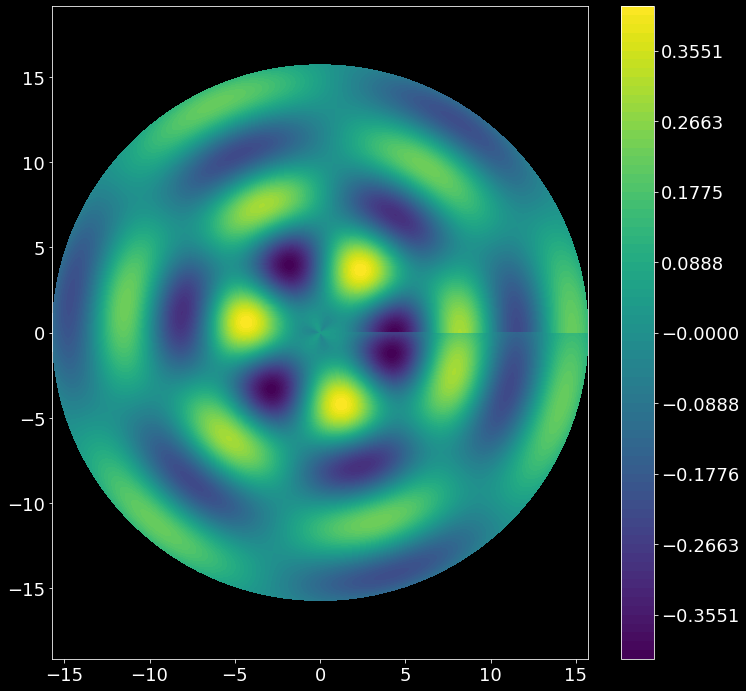

In [184]:
om = np.pi # np.sqrt(2.0)

# 2D grid
phi = np.linspace(0.0, 2.0 * np.pi, num=250)
r = np.linspace(0, 5.0*np.pi, num=250)
x = np.tensordot(r, np.cos(phi), axes=0)
y = np.tensordot(r, np.sin(phi), axes=0)

# Anger: Define integrand
def integrand(quads, om, x):
    # affine transformation to prepare quad method quads=[-1,1] -> [0, pi]
    theta = 0.5 * np.pi * (1.0 + quads)
    # build integrand, shape (quad points, real om, imag om, k)
    # compute product theta * omega, 
    t_f = np.tensordot(np.tensordot(theta, om, axes=0),
                       np.ones_like(x), axes=0)
    # compute product x * sin(theta)
    x_sint = np.tensordot(np.sin(theta),
                          np.tensordot(np.ones_like(om), x, axes=0), axes=0)
    # compute cos(theta*omega - x*sin(theta))
    return np.cos(t_f - x_sint)

# Compute anger function using GL quadrature
integrand_on_quads = integrand(quads=quad_arr[:, 1], om=om, x=r) # np.sqrt(r**2.0 + om**2.0))
f1 = 0.5 * np.pi # quad scaling factor from [0, pi] -> [-1, 1] and norm of integral form
result = f1 * np.tensordot(quad_arr[:, 2], integrand_on_quads, axes=([0], [0]))
anger = -result / np.pi

# Compute polar oscillator
polar_osc = np.tensordot(anger, np.exp(1j * om * phi), axes=0)
# polar_osc = np.tensordot(sp.jv(r, om), np.exp(1j * om * phi), axes=0)

po_r = np.real(polar_osc)
po_i = np.imag(polar_osc)
cb_r = np.linspace(np.amin(po_r), np.amax(po_r), num=75)

# Plot in Cartesian coordinates
plt.close('all')
plt.figure()
plt.contourf(x, y, po_r, cb_r)
plt.colorbar()
plt.axis('equal')
plt.show()

### Actual series:

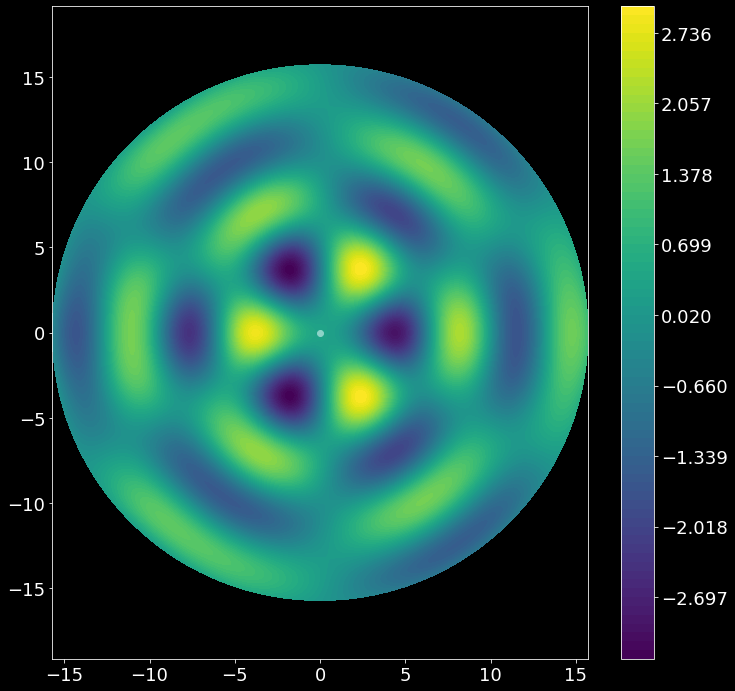

In [182]:
om = np.pi

# Partial sum
def coefficients_2D(om, n):
    return (-1.0) ** n / (om - n)
    # return n / (om - n)

# phi = np.linspace(0, 2.0 * np.pi, num=250)

# 1D grid
phi = np.linspace(-np.pi, np.pi, num=250)

# 2D grid
r = np.linspace(0, 5.0*np.pi, num=250)
x = np.tensordot(r, np.cos(phi), axes=0)
y = np.tensordot(r, np.sin(phi), axes=0)

terms = 400
series_2d = np.array([coefficients_2D(om, n) * 
                      np.tensordot(sp.jv(n, r), np.exp(-1j * n * phi), axes=0)
                     for n in range(1-terms, terms)]).sum(axis=0)

# series = series_2d #  / np.sin(np.pi * om) * np.pi
rsp = np.tensordot(r, np.sin(phi), axes=0)
# series_2d = np.multiply(series_2d, np.exp(0.1 * 1j * rsp))
series_r = np.real(series_2d)
cb_sr = np.linspace(np.amin(series_r), np.amax(series_r), num=75)

# Plot in Cartesian coordinates
plt.close('all')
plt.figure()
plt.contourf(x, y, series_r, cb_sr)
plt.colorbar()
plt.axis('equal')
plt.scatter([0], [0])
plt.show()

### Conclusion: Close, but an issue with the angle when summing the series

### It needs to have a shorter wavelength. What if I use the frequency floor?

2.995510958307106
3.291164223338112


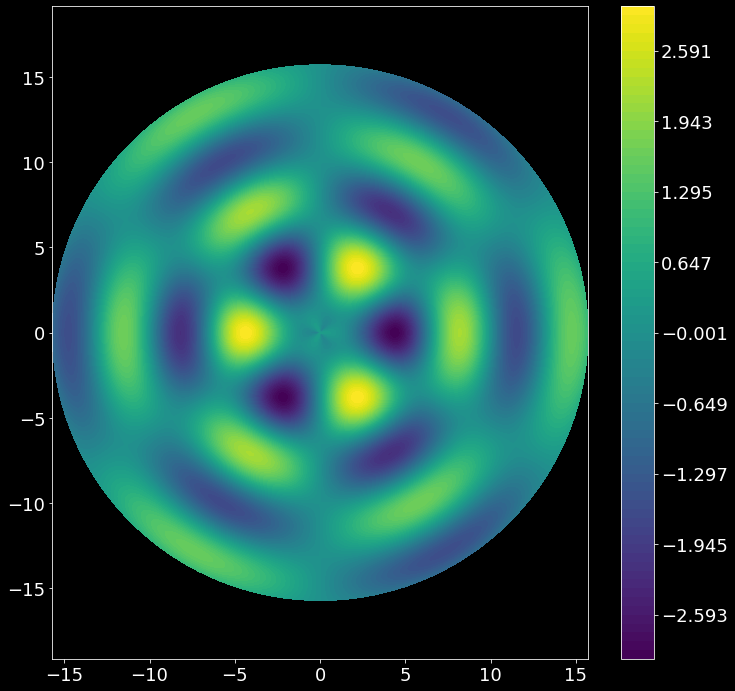

In [160]:
# Compute polar oscillator
polar_osc_wfloor = np.tensordot(anger, np.exp(1j * (om//1) * phi), axes=0)
# polar_osc = np.tensordot(sp.jv(r, om), np.exp(1j * om * phi), axes=0)

po_r_f = np.real(polar_osc_wfloor) * np.pi / np.sin(np.pi * om)
po_i_f = np.imag(polar_osc_wfloor)
cb_r_f = np.linspace(np.amin(po_r_f), np.amax(po_r_f), num=75)

print(np.amax(po_r_f))
print(np.amax(series_r))

# Plot in Cartesian coordinates
plt.close('all')
plt.figure()
plt.contourf(x, y, po_r_f, cb_r_f)
plt.colorbar()
plt.axis('equal')
plt.show()

### Looks right? Error field:

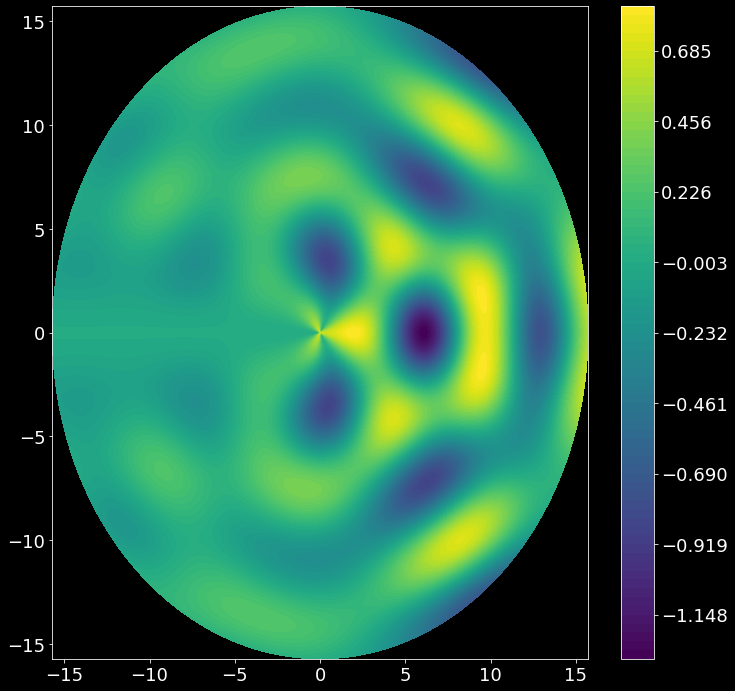

In [157]:
# print(np.amax(po_r_f))
# print(np.amax(series_r))

# po_r_f = po_r_f * np.amax(series_r) / np.amax(po_r_f)

# print(np.amax(po_r_f))
# print(np.amax(series_r))

diff = po_r_f - series_r
cbd = np.linspace(np.amin(diff), np.amax(diff), num=75)

plt.close('all')
plt.figure()
plt.contourf(x, y, diff, cbd)
plt.colorbar()
plt.show()

### Clues:

The function's integral form is:

$\displaystyle F \equiv \sum_{n=-\infty}^\infty\frac{(-1)^n}{\omega - n}J_n(r)e^{in\varphi} = \frac{1}{2\pi}\int_{-\pi}^\pi e^{ir\sin(\theta)}\sum_{n=-\infty}^\infty\frac{e^{i(\varphi+\theta)}}{\omega - n}d\theta$

For $\varphi = 0$, $F = \frac{\pi}{\sin(\pi\omega)}\textbf{J}_\omega(r)$,

and for $\varphi = \pi$, $F = \frac{-i\pi}{\sin(\pi\omega)}\textbf{E}_{-\omega}(r)$

where $\textbf{J}_{\omega}$ is the "Anguer" function and $\textbf{E}_\omega$ the Weber function.